In [9]:
!pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from nltk import pos_tag, ne_chunk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

from google.colab import files
uploaded = files.upload()

# Attempt to read the file with UTF-8 encoding, handling errors
with open('EAI6000_test_text.txt', 'r', encoding='utf-8', errors='ignore') as file:
    text = file.read()



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


Saving EAI6000_test_text.txt to EAI6000_test_text (1).txt


In [11]:
#Tokenization


sentences = sent_tokenize(text)
words = word_tokenize(text.lower())
print(sentences)
print(words)

['CHAPTER TWENTY-FOUR\nThe wooden sea cadet shatters\n  Week after week passed without a single enemy appearing in the fortified refuge, yet Captain Cuttle did not in the least neglect his wise precautions of surprise.', 'He decided that his current security was too secure and wondrous to last much longer.', "He knew that when the wind was favorable a weather vane seldom remained in place, and he knew too well Mrs. MacStinger's determined and fearless nature to suspect that this heroic woman had undertaken to find and capture her.", 'Shaking under the weight of these shocks, Captain Cuttle lived very much alone and withdrawn.', 'He rarely dared to go out before dark, and even then only on the darkest streets.', "On Sundays he never moved outside, and both in his refuge and outside its walls he avoided women's hats as if they were on the heads of rabid red deer.", "The captain didn't even dream that he would be able to resist if Mrs. MacStinger attacked him while walking.", 'In his mind

In [12]:
#Check stopwords and punctuations
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.isalnum() and word not in stop_words]
print(filtered_words)

['chapter', 'wooden', 'sea', 'cadet', 'shatters', 'week', 'week', 'passed', 'without', 'single', 'enemy', 'appearing', 'fortified', 'refuge', 'yet', 'captain', 'cuttle', 'least', 'neglect', 'wise', 'precautions', 'surprise', 'decided', 'current', 'security', 'secure', 'wondrous', 'last', 'much', 'longer', 'knew', 'wind', 'favorable', 'weather', 'vane', 'seldom', 'remained', 'place', 'knew', 'well', 'macstinger', 'determined', 'fearless', 'nature', 'suspect', 'heroic', 'woman', 'undertaken', 'find', 'capture', 'shaking', 'weight', 'shocks', 'captain', 'cuttle', 'lived', 'much', 'alone', 'withdrawn', 'rarely', 'dared', 'go', 'dark', 'even', 'darkest', 'streets', 'sundays', 'never', 'moved', 'outside', 'refuge', 'outside', 'walls', 'avoided', 'women', 'hats', 'heads', 'rabid', 'red', 'deer', 'captain', 'even', 'dream', 'would', 'able', 'resist', 'macstinger', 'attacked', 'walking', 'mind', 'already', 'saw', 'placed', 'flexibly', 'rented', 'carriage', 'imagined', 'mind', 'would', 'transpor

In [13]:
#Frequency Distribution

freq_dist = FreqDist(filtered_words)
print(freq_dist.most_common(10))

[('captain', 144), ('toots', 60), ('said', 38), ('cuttle', 29), ('would', 29), ('man', 25), ('rob', 24), ('mind', 21), ('gills', 21), ('even', 19)]


In [17]:
#Stemming and Lemmatization
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
words_stemmed = [stemmer.stem(word) for word in filtered_words]
words_lemmatized = [lemmatizer.lemmatize(word) for word in filtered_words]
print(words_stemmed)
print(words_lemmatized)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['chapter', 'wooden', 'sea', 'cadet', 'shatter', 'week', 'week', 'pass', 'without', 'singl', 'enemi', 'appear', 'fortifi', 'refug', 'yet', 'captain', 'cuttl', 'least', 'neglect', 'wise', 'precaut', 'surpris', 'decid', 'current', 'secur', 'secur', 'wondrou', 'last', 'much', 'longer', 'knew', 'wind', 'favor', 'weather', 'vane', 'seldom', 'remain', 'place', 'knew', 'well', 'macsting', 'determin', 'fearless', 'natur', 'suspect', 'heroic', 'woman', 'undertaken', 'find', 'captur', 'shake', 'weight', 'shock', 'captain', 'cuttl', 'live', 'much', 'alon', 'withdrawn', 'rare', 'dare', 'go', 'dark', 'even', 'darkest', 'street', 'sunday', 'never', 'move', 'outsid', 'refug', 'outsid', 'wall', 'avoid', 'women', 'hat', 'head', 'rabid', 'red', 'deer', 'captain', 'even', 'dream', 'would', 'abl', 'resist', 'macsting', 'attack', 'walk', 'mind', 'alreadi', 'saw', 'place', 'flexibl', 'rent', 'carriag', 'imagin', 'mind', 'would', 'transport', 'back', 'former', 'apart', 'foresaw', 'would', 'old', 'man', 'ever

In [18]:
#POS tagging
pos_tags = pos_tag(filtered_words)
print(pos_tags)

[('chapter', 'NN'), ('wooden', 'WRB'), ('sea', 'NN'), ('cadet', 'NN'), ('shatters', 'NNS'), ('week', 'NN'), ('week', 'NN'), ('passed', 'VBN'), ('without', 'IN'), ('single', 'JJ'), ('enemy', 'NN'), ('appearing', 'VBG'), ('fortified', 'VBN'), ('refuge', 'NN'), ('yet', 'RB'), ('captain', 'JJ'), ('cuttle', 'NN'), ('least', 'JJS'), ('neglect', 'JJ'), ('wise', 'NN'), ('precautions', 'NNS'), ('surprise', 'VBP'), ('decided', 'JJ'), ('current', 'JJ'), ('security', 'NN'), ('secure', 'NN'), ('wondrous', 'JJ'), ('last', 'JJ'), ('much', 'JJ'), ('longer', 'JJR'), ('knew', 'VBD'), ('wind', 'RBR'), ('favorable', 'JJ'), ('weather', 'NN'), ('vane', 'NN'), ('seldom', 'NN'), ('remained', 'VBD'), ('place', 'NN'), ('knew', 'RB'), ('well', 'RB'), ('macstinger', 'RB'), ('determined', 'VBN'), ('fearless', 'JJ'), ('nature', 'NN'), ('suspect', 'NN'), ('heroic', 'NN'), ('woman', 'NN'), ('undertaken', 'JJ'), ('find', 'JJ'), ('capture', 'NN'), ('shaking', 'VBG'), ('weight', 'NN'), ('shocks', 'NNS'), ('captain', 'VB

In [20]:
#Name Entity Recognition (NER)
ner_tags = ne_chunk(pos_tags)


In [21]:
#N-grams
from nltk import ngrams
bigrams = ngrams(filtered_words, 2)
trigrams = ngrams(filtered_words, 3)
print(list(bigrams))
print(list(trigrams))


[('chapter', 'wooden'), ('wooden', 'sea'), ('sea', 'cadet'), ('cadet', 'shatters'), ('shatters', 'week'), ('week', 'week'), ('week', 'passed'), ('passed', 'without'), ('without', 'single'), ('single', 'enemy'), ('enemy', 'appearing'), ('appearing', 'fortified'), ('fortified', 'refuge'), ('refuge', 'yet'), ('yet', 'captain'), ('captain', 'cuttle'), ('cuttle', 'least'), ('least', 'neglect'), ('neglect', 'wise'), ('wise', 'precautions'), ('precautions', 'surprise'), ('surprise', 'decided'), ('decided', 'current'), ('current', 'security'), ('security', 'secure'), ('secure', 'wondrous'), ('wondrous', 'last'), ('last', 'much'), ('much', 'longer'), ('longer', 'knew'), ('knew', 'wind'), ('wind', 'favorable'), ('favorable', 'weather'), ('weather', 'vane'), ('vane', 'seldom'), ('seldom', 'remained'), ('remained', 'place'), ('place', 'knew'), ('knew', 'well'), ('well', 'macstinger'), ('macstinger', 'determined'), ('determined', 'fearless'), ('fearless', 'nature'), ('nature', 'suspect'), ('suspect

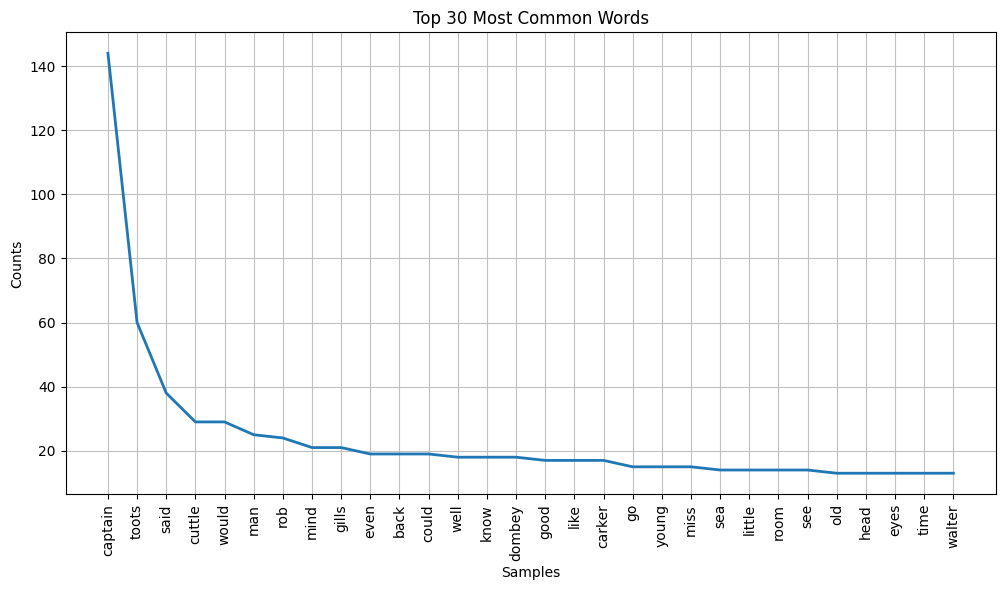

In [25]:
#Word Frequency Distribution
import matplotlib.pyplot as plt
from nltk.probability import FreqDist

# Frequency Distribution of words
fdist = FreqDist(filtered_words)

# Plot the top 30 most common words
plt.figure(figsize=(12, 6))
fdist.plot(30, cumulative=False, title='Top 30 Most Common Words')
plt.show()

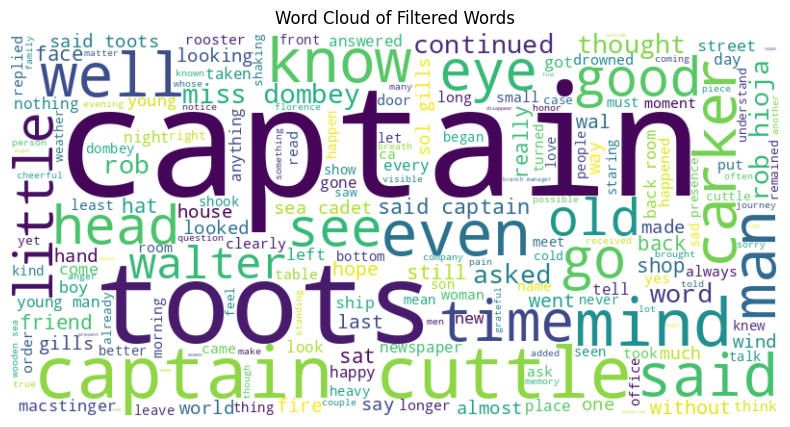

In [27]:
#Word Cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Filtered Words')
plt.show()


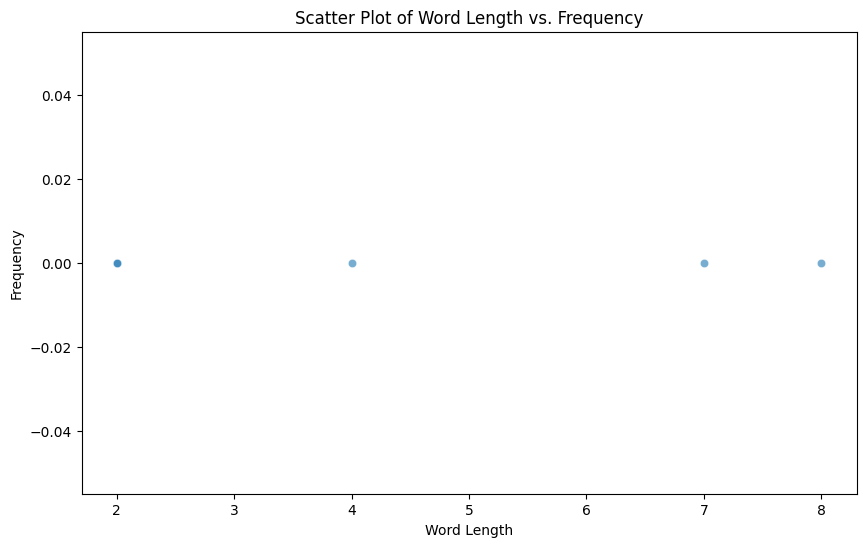

In [34]:
# Calculate word lengths
word_lengths = [len(word) for word in filtered_words]

# Combine word lengths and frequencies into a DataFrame
length_freq_df = pd.DataFrame({'Word Length': word_lengths, 'Frequency': [fdist[word] for word in filtered_words]})

# Plot scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Word Length', y='Frequency', data=length_freq_df, alpha=0.6)
plt.title('Scatter Plot of Word Length vs. Frequency')
plt.show()


Sources:
https://www.kaggle.com/code/alvations/basic-nlp-with-nltk
https://www.kaggle.com/code/brendan45774/word-cloud-analyzing-names
https://www.kaggle.com/competitions/jigsaw-unintended-bias-in-toxicity-classification/discussion/91432
https://www.gutenberg.org/cache/epub/74267/pg74267.html

I have extracted a part from the book DOMBEY AND THE BOY II, which was listed on the Gutenberg Project. To be specific, chapter 24 from the book. I have created a plain text file with UTF-8 encoding to process this data. Some of the codes above were automatically suggested after I commented out the topic such as #POS_tagging and #N-grams.